In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [3]:
def preprocessData(filename):
    df = pd.read_parquet(filename)
    df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df.trip_duration = df.trip_duration.apply(lambda td: td.total_seconds()/60)
    df = df[(df.trip_duration >=1)&(df.trip_duration <=60)]
    categorical = ['PULocationID', 'DOLocationID']
    numerical = ['trip_distance']

    df[categorical] = df[categorical].astype(str)
    return df


In [4]:
train = '/home/mlops_zoomcamp/mlops_zoomcamp/data/yellow_tripdata_2023-01.parquet'
val = '/home/mlops_zoomcamp/mlops_zoomcamp/data/yellow_tripdata_2023-02.parquet'

In [5]:
df_train = preprocessData(train)
df_val = preprocessData(val)

In [6]:
len(df_train), len(df_val)

(3009173, 2855951)

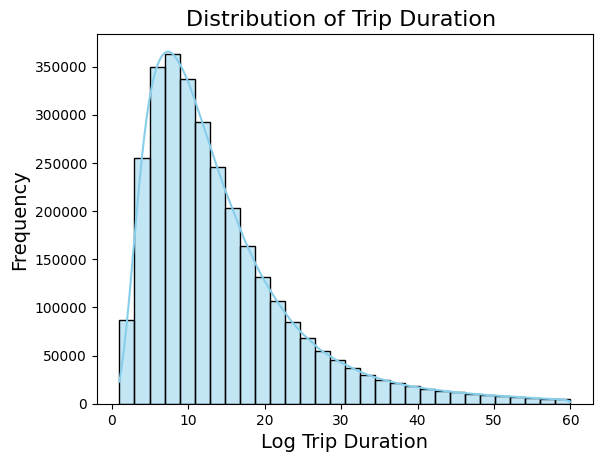

In [7]:
# df_train['log_trip_duration'] = np.log(df_train['trip_duration'] + 1)

# Using sns.histplot to create a histogram with a KDE overlay
sns.histplot(df_train['trip_duration'], kde=True, color='skyblue', edgecolor='black', bins=30)

# Add a title and labels
plt.title('Distribution of Trip Duration ', fontsize=16)
plt.xlabel('Log Trip Duration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a rug plot for additional insight
# sns.rugplot(df_train['trip_duration'], color='black')

# Show the plot
plt.show()


In [10]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
target = 'trip_duration'

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

Y_train = df_train[target].values
Y_val = df_val[target].values


In [11]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

y_pred = lr.predict(X_val)
root_mean_squared_error(Y_val, y_pred)

7.820270163704565

/tmp/ipykernel_6381/882622148.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_6381/882622148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_val, label='True')


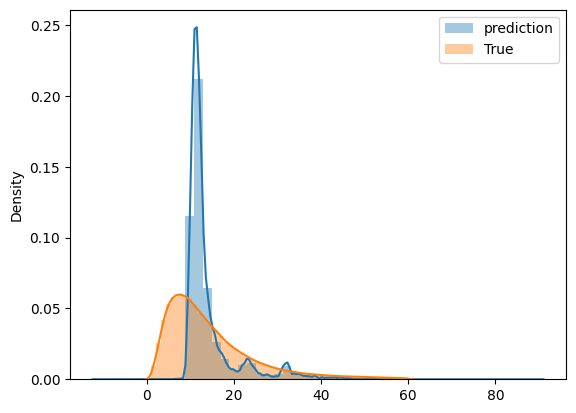

In [12]:
sns.distplot(y_pred, label='prediction')
sns.distplot(Y_val, label='True')
plt.legend()